In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [24]:
df = pd.read_csv('oceny_studentow.csv')

In [25]:
print(df)

     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk
0             0           962560        5.0        3.0
1             1           905220        2.0        4.5
2             2           882698        2.0        3.5
3             3           856084        3.5        2.5
4             4           909337        4.0        5.0
..          ...              ...        ...        ...
493         493           909272        5.0        3.5
494         494           860148        4.0        2.0
495         495           919541        2.0        4.0
496         496           915447        4.5        4.0
497         497           905212        4.0        5.0

[498 rows x 4 columns]


In [26]:
df[ 'ocena_kon' ] = ( df.ocena_lab * 0.4 ) + ( df.ocena_wyk * 0.6 )

roznica = ( df['ocena_kon'] - df['ocena_kon'].apply( np.floor ) )

df.loc[ df[ 'ocena_lab' ] == 2.0, 'ocena_kon' ] = 2.0
df.loc[ df[ 'ocena_wyk' ] == 2.0, 'ocena_kon' ] = 2.0
df.loc[ roznica > 0.5, 'ocena_kon' ] = df[ 'ocena_kon' ].apply( np.ceil )
df.loc[ roznica < 0.5, 'ocena_kon' ] = df[ 'ocena_kon' ].apply( np.floor )

print( df )



     Unnamed: 0  indeks_studenta  ocena_lab  ocena_wyk  ocena_kon
0             0           962560        5.0        3.0        4.0
1             1           905220        2.0        4.5        2.0
2             2           882698        2.0        3.5        2.0
3             3           856084        3.5        2.5        3.0
4             4           909337        4.0        5.0        5.0
..          ...              ...        ...        ...        ...
493         493           909272        5.0        3.5        4.0
494         494           860148        4.0        2.0        2.0
495         495           919541        2.0        4.0        2.0
496         496           915447        4.5        4.0        4.0
497         497           905212        4.0        5.0        5.0

[498 rows x 5 columns]


In [29]:
idx = [ '2.0', '3.0', '3.5', '4.0', '4.5', '5.0', 'średnia ocen', 'średnia ocen końcowych', 'ilość osób, które zaliczyły kurs', 'ilość osób, które nie zaliczyły kursu' ]

nzal = df[ df[ 'ocena_kon' ] == 2.0 ][ 'ocena_kon' ].count()
zal = df[ df[ 'ocena_kon' ] >= 3.0 ][ 'ocena_kon' ].count()

ile_lab_2_0 = df[ df[ 'ocena_lab' ] == 2.0 ][ 'ocena_lab' ].count()
ile_lab_3_0 = df[ df[ 'ocena_lab' ] == 3.0 ][ 'ocena_lab' ].count()
ile_lab_3_5 = df[ df[ 'ocena_lab' ] == 3.5 ][ 'ocena_lab' ].count()
ile_lab_4_0 = df[ df[ 'ocena_lab' ] == 4.0 ][ 'ocena_lab' ].count()
ile_lab_4_5 = df[ df[ 'ocena_lab' ] == 4.5 ][ 'ocena_lab' ].count()
ile_lab_5_0 = df[ df[ 'ocena_lab' ] == 5.0 ][ 'ocena_lab' ].count()

ile_wyk_2_0 = df[ df[ 'ocena_wyk' ] == 2.0 ][ 'ocena_wyk' ].count()
ile_wyk_3_0 = df[ df[ 'ocena_wyk' ] == 3.0 ][ 'ocena_wyk' ].count()
ile_wyk_3_5 = df[ df[ 'ocena_wyk' ] == 3.5 ][ 'ocena_wyk' ].count()
ile_wyk_4_0 = df[ df[ 'ocena_wyk' ] == 4.0 ][ 'ocena_wyk' ].count()
ile_wyk_4_5 = df[ df[ 'ocena_wyk' ] == 4.5 ][ 'ocena_wyk' ].count()
ile_wyk_5_0 = df[ df[ 'ocena_wyk' ] == 5.0 ][ 'ocena_wyk' ].count()
wyk = pd.Series( [ ile_wyk_2_0, ile_wyk_3_0, ile_wyk_3_5, ile_wyk_4_0, ile_wyk_4_5, ile_wyk_5_0, df[ 'ocena_wyk' ].mean(), df[ 'ocena_kon' ].mean(), zal, nzal ], index = idx )

lab = pd.Series( [ ile_lab_2_0, ile_lab_3_0, ile_lab_3_5, ile_lab_4_0, ile_lab_4_5, ile_lab_5_0, df[ 'ocena_lab' ].mean(), '', '', '' ], index = idx )

summary = pd.DataFrame( [ wyk, lab ], index = [ 'wykłady', 'laboratoria' ] )

print( summary )

summary.to_csv( 'Podsumowanie.csv' )


               2.0   3.0   3.5   4.0   4.5   5.0  średnia ocen  \
wykłady       78.0  65.0  69.0  78.0  63.0  69.0      3.459839   
laboratoria  129.0  75.0  87.0  72.0  68.0  67.0      3.446787   

            średnia ocen końcowych ilość osób, które zaliczyły kurs  \
wykłady                    3.13755                            311.0   
laboratoria                                                           

            ilość osób, które nie zaliczyły kursu  
wykłady                                     187.0  
laboratoria                                        


In [35]:
font1 = {
        'size': 18,
        'weight': 'bold'
        }

font2 = {
        'size': 16,
        'weight': 'bold'
        }

In [36]:
labels = [ 2.0, 3.0, 3.5, 4.0, 4.5, 5.0 ]

ocena_lab_2_0 = df[ df[ 'ocena_lab' ] == 2.0 ][ 'ocena_lab' ].count()
ocena_lab_3_0 = df[ df[ 'ocena_lab' ] == 3.0 ][ 'ocena_lab' ].count()
ocena_lab_3_5 = df[ df[ 'ocena_lab' ] == 3.5 ][ 'ocena_lab' ].count()
ocena_lab_4_0 = df[ df[ 'ocena_lab' ] == 4.0 ][ 'ocena_lab' ].count()
ocena_lab_4_5 = df[ df[ 'ocena_lab' ] == 4.5 ][ 'ocena_lab' ].count()
ocena_lab_5_0 = df[ df[ 'ocena_lab' ] == 5.0 ][ 'ocena_lab' ].count()

ocena_wyk_2_0 = df[ df[ 'ocena_wyk' ] == 2.0 ][ 'ocena_wyk' ].count()
ocena_wyk_3_0 = df[ df[ 'ocena_wyk' ] == 3.0 ][ 'ocena_wyk' ].count()
ocena_wyk_3_5 = df[ df[ 'ocena_wyk' ] == 3.5 ][ 'ocena_wyk' ].count()
ocena_wyk_4_0 = df[ df[ 'ocena_wyk' ] == 4.0 ][ 'ocena_wyk' ].count()
ocena_wyk_4_5 = df[ df[ 'ocena_wyk' ] == 4.5 ][ 'ocena_wyk' ].count()
ocena_wyk_5_0 = df[ df[ 'ocena_wyk' ] == 5.0 ][ 'ocena_wyk' ].count()

y_lab = np.array( [ ocena_lab_2_0, ocena_lab_3_0, ocena_lab_3_5, ocena_lab_4_0, ocena_lab_4_5, ocena_lab_5_0  ] )
x_lab = np.arange( len( y_lab ) )

y_wyk = [ ocena_wyk_2_0, ocena_wyk_3_0, ocena_wyk_3_5, ocena_wyk_4_0, ocena_wyk_4_5, ocena_wyk_5_0  ]
x_wyk = np.arange( len( y_lab ) )

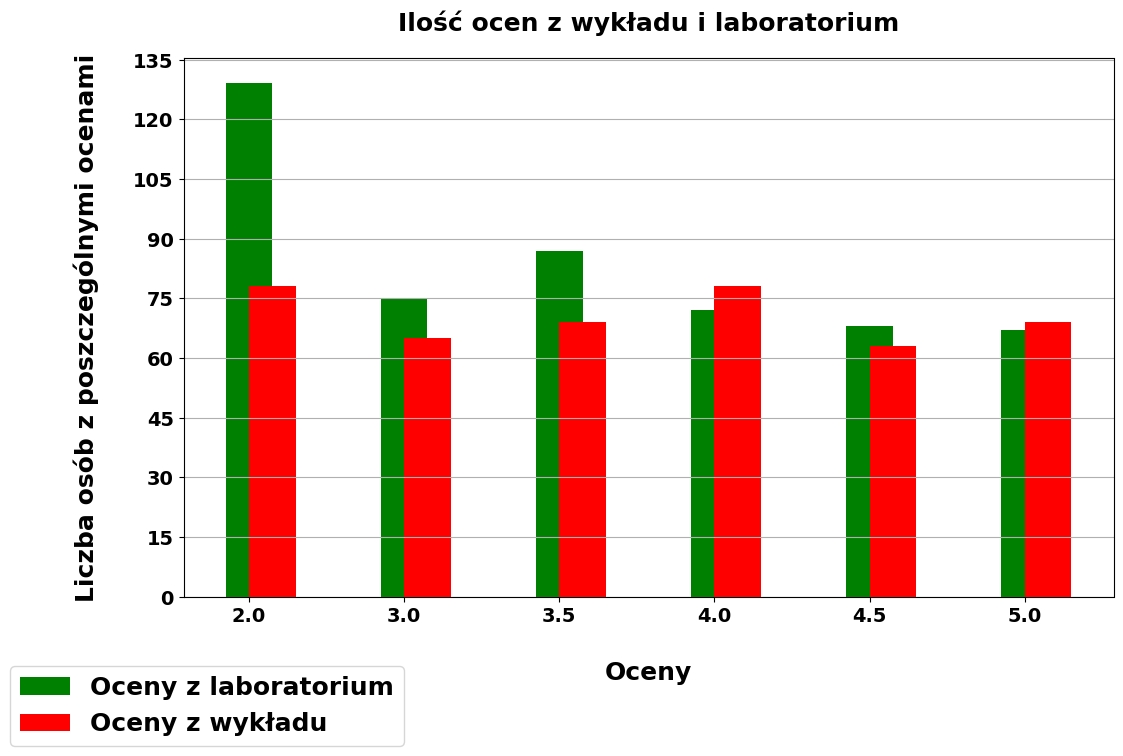

In [38]:
plt.figure( figsize = ( 12, 7 ) )

plt.title( 'Ilość ocen z wykładu i laboratorium', pad = 20, fontdict = font1 )

plt.bar( x_lab, y_lab, color = 'green', label = 'Oceny z laboratorium', width = 0.3 )
plt.bar( x_wyk, y_wyk, color = 'red', label = 'Oceny z wykładu', width = 0.3, align = 'edge' )

plt.xticks( x_lab, labels, fontsize = 14, fontweight = 'bold' )
plt.yticks( np.arange( 0, 150, 15 ), fontsize = 14, fontweight = 'bold' )

plt.xlabel( 'Oceny', labelpad = 25 ,fontdict = font1 )
plt.ylabel( 'Liczba osób z poszczególnymi ocenami', labelpad = 25, fontdict = font1 )

plt.legend( loc = 'lower left', bbox_to_anchor = ( -0.2, -0.3 ), prop = font1 )

plt.grid( axis = 'y' )

plt.show()

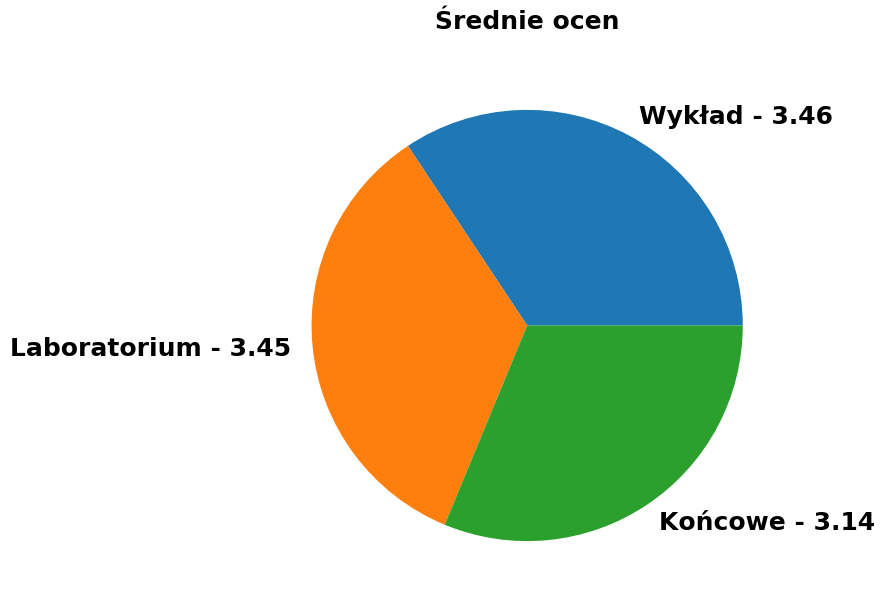

<Figure size 1200x700 with 0 Axes>

In [45]:
srlab=round(df['ocena_lab'].mean(),2)
srwyk=round(df['ocena_wyk'].mean(),2)
srkon=round(df['ocena_kon'].mean(),2)
srednie=[srlab,srwyk,srkon]
plt.figure(figsize=(12,7))
plt.show()
